### Evolution of trotilla price from 2007 to 2024

The objective of this analysis is to present the historical price trends of 1 kg of tortilla, examining its variations across different cities, states, and types of stores. The analysis concludes with a visualization of 2024 prices for all states in Mexico. The purpose is to create a basis for identifying potential causes and factors driving the price increase of Mexico's most consumed food item.

In [1]:
# Remove some future warnings
import warnings 
warnings.simplefilter(action = "ignore", category = Warning)

In [3]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas

In [4]:
# load files
tortilla_prices = pd.read_csv("tortilla_prices.csv")

In [5]:
tortilla_prices.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


### Visualize file structure and information

In [6]:
# visualize first records of the dataframe
tortilla_prices.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2007,1,10,Mom and Pop Store,9.9
1,Baja California,Mexicali,2007,1,10,Mom and Pop Store,NaN
2,Baja California,Tijuana,2007,1,10,Mom and Pop Store,10.0
3,Baja California Sur,La Paz,2007,1,10,Mom and Pop Store,10.0
4,Campeche,Campeche,2007,1,10,Mom and Pop Store,10.0


In [9]:
tortilla_prices.nunique()

State                   32
City                    56
Year                    18
Month                   12
Day                     31
Store type               2
Price per kilogram    1233
dtype: int64

In [15]:
tortilla_prices.columns

Index(['State', 'City', 'Year', 'Month', 'Day', 'Store type',
       'Price per kilogram'],
      dtype='object')

In [18]:
tortilla_prices['State'].unique()

array(['Aguascalientes', 'Baja\xa0California',
       'Baja\xa0California\xa0Sur', 'Campeche', 'Coahuila', 'Colima',
       'Chiapas', 'Chihuahua', 'D.F.', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Edo.\xa0México', 'Michoacán',
       'Morelos', 'Nayarit', 'Nuevo\xa0León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana\xa0Roo', 'San\xa0Luis\xa0Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala', 'Veracruz',
       'Yucatán', 'Zacatecas'], dtype=object)

In [19]:
tortilla_prices.loc[:, 'State'] = tortilla_prices.State.replace('\xa0',' ',regex=True)

In [20]:
tortilla_prices['State'].unique()

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila', 'Colima', 'Chiapas', 'Chihuahua', 'D.F.',
       'Durango', 'Guanajuato', 'Guerrero', 'Hidalgo', 'Jalisco',
       'Edo. México', 'Michoacán', 'Morelos', 'Nayarit', 'Nuevo León',
       'Oaxaca', 'Puebla', 'Querétaro', 'Quintana Roo', 'San Luis Potosí',
       'Sinaloa', 'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz', 'Yucatán', 'Zacatecas'], dtype=object)

In [21]:
tortilla_prices['City'].unique()

array(['Aguascalientes', 'Mexicali', 'Tijuana', 'La\xa0Paz', 'Campeche',
       'Piedras\xa0Negras', 'Saltillo', 'Colima', 'Tapachula',
       'Tuxtla\xa0Gutiérrez', 'Chihuahua', 'Cd.\xa0Juárez', 'D.F.',
       'ZM\xa0D.F.', 'Durango', 'Gómez\xa0Palacio', 'Irapuato', 'León',
       'Acapulco', 'Chilpancingo', 'Pachuca', 'Guadalajara',
       'ZM\xa0Guadalajara', 'Toluca', 'Morelia', 'Cuernavaca', 'Tepic',
       'Monterrey', 'ZM\xa0Monterrey', 'Oaxaca', 'Puebla', 'ZM\xa0Puebla',
       'Querétaro', 'Cancún', 'Chetumal', 'San\xa0Luis\xa0Potosí',
       'Culiacán', 'Cd.\xa0Obregón', 'Hermosillo', 'Nogales',
       'Villahermosa', 'Cd.\xa0Victoria', 'Matamoros', 'Nuevo\xa0Laredo',
       'Reynosa', 'Tampico', 'Tlaxcala', 'Coatzacoalcos', 'Poza\xa0Rica',
       'Veracruz', 'Xalapa', 'Mérida', 'Zacatecas', 'Torreón', 'Celaya',
       'San\xa0Luis\xa0Río\xa0Colorado'], dtype=object)

In [22]:
tortilla_prices.loc[:, 'City'] = tortilla_prices.City.replace('\xa0',' ',regex=True)

In [23]:
tortilla_prices['City'].unique()

array(['Aguascalientes', 'Mexicali', 'Tijuana', 'La Paz', 'Campeche',
       'Piedras Negras', 'Saltillo', 'Colima', 'Tapachula',
       'Tuxtla Gutiérrez', 'Chihuahua', 'Cd. Juárez', 'D.F.', 'ZM D.F.',
       'Durango', 'Gómez Palacio', 'Irapuato', 'León', 'Acapulco',
       'Chilpancingo', 'Pachuca', 'Guadalajara', 'ZM Guadalajara',
       'Toluca', 'Morelia', 'Cuernavaca', 'Tepic', 'Monterrey',
       'ZM Monterrey', 'Oaxaca', 'Puebla', 'ZM Puebla', 'Querétaro',
       'Cancún', 'Chetumal', 'San Luis Potosí', 'Culiacán', 'Cd. Obregón',
       'Hermosillo', 'Nogales', 'Villahermosa', 'Cd. Victoria',
       'Matamoros', 'Nuevo Laredo', 'Reynosa', 'Tampico', 'Tlaxcala',
       'Coatzacoalcos', 'Poza Rica', 'Veracruz', 'Xalapa', 'Mérida',
       'Zacatecas', 'Torreón', 'Celaya', 'San Luis Río Colorado'],
      dtype=object)

In [24]:
tortilla_prices['Year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=int64)

In [25]:
tortilla_prices['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [26]:
tortilla_prices['Day'].unique()

array([10, 12, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31,
        1,  2,  3,  6,  7,  8,  9, 13, 14, 21, 28,  5,  4, 11],
      dtype=int64)

In [28]:
tortilla_prices['Store type'].unique()

array(['Mom and Pop Store', 'Big Retail Store'], dtype=object)

In [29]:
tortilla_prices['Price per kilogram'].unique()

array([ 9.9 ,   nan, 10.  , ..., 19.56, 19.39, 15.47])

In [30]:
tortilla_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278886 entries, 0 to 278885
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               278886 non-null  object 
 1   City                278886 non-null  object 
 2   Year                278886 non-null  int64  
 3   Month               278886 non-null  int64  
 4   Day                 278886 non-null  int64  
 5   Store type          278886 non-null  object 
 6   Price per kilogram  272496 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 14.9+ MB


### Calculate mean prices by Store Type from 2007 to 2024

In [31]:
# Mean price time series (by year and store type)

tortilla_prices_byStoreType_Year = tortilla_prices.groupby(['Store type', 'Year'])['Price per kilogram'].mean().to_frame().reset_index()

In [32]:
tortilla_prices_byStoreType_Year

,Store type,Year,Price per kilogram
0,Big Retail Store,2007,5.742156
1,Big Retail Store,2008,5.792634
2,Big Retail Store,2009,6.252945
3,Big Retail Store,2010,6.781813
4,Big Retail Store,2011,7.729758
5,Big Retail Store,2012,9.627976
6,Big Retail Store,2013,10.236948
7,Big Retail Store,2014,9.992665
8,Big Retail Store,2015,9.952026
9,Big Retail Store,2016,10.063766


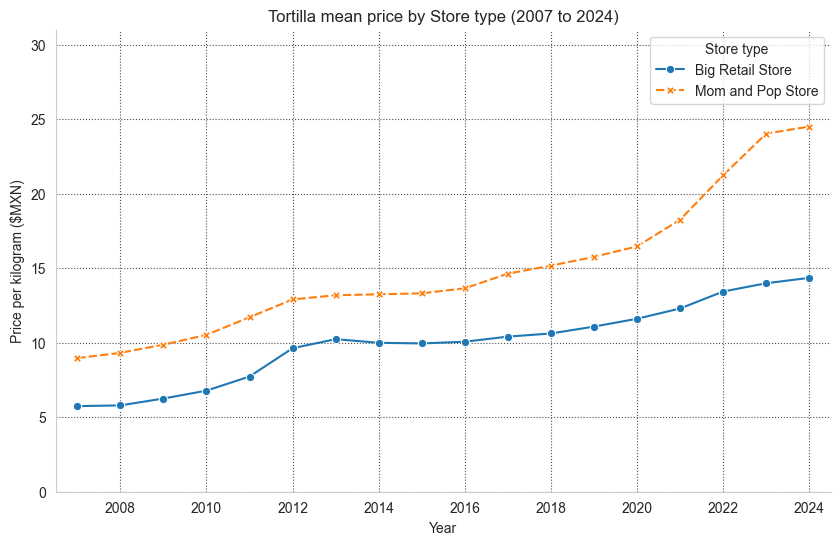

In [33]:
# plot mean price by store type and year

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid", {"grid.color": ".3", "grid.linestyle": ":"})
g = sns.lineplot(data = tortilla_prices_byStoreType_Year, x = 'Year',
                y = 'Price per kilogram', hue = 'Store type', style = 'Store type', markers = True)
g.set_xlim(2006.5, 2024.5)
g.set_ylim(0, 31)
g.set(title = "Tortilla mean price by Store type (2007 to 2024)", ylabel = "Price per kilogram ($MXN)")
sns.despine()

&#x2705; The price of tortilla in mom-and-pop stores has significantly increased over the years, with the difference in prices nearly doubling since the start of the COVID-19 pandemic. In 2020, prices were 16.46 MXN for mom-and-pop stores and 11.60 MXN for big retail stores. By 2023, the mean prices had risen to 24.02 MXN and 13.98 MXN, respectively. 

It would be interesting to plot this data by state instead of the nationwide average


In [35]:
# mean price time series (by year, store type and state)
tortilla_prices_byStoreType_Year_State = tortilla_prices.groupby(['Store type', 'Year', 'State'])['Price per kilogram'].mean().to_frame().reset_index()

In [36]:
tortilla_prices_byStoreType_Year_State

,Store type,Year,State,Price per kilogram
0,Big Retail Store,2007,Aguascalientes,5.773962
1,Big Retail Store,2007,Baja California,5.862248
2,Big Retail Store,2007,Baja California Sur,5.715220
3,Big Retail Store,2007,Campeche,5.681509
4,Big Retail Store,2007,Chiapas,5.767622
...,...,...,...,...
1147,Mom and Pop Store,2024,Tamaulipas,27.300000
1148,Mom and Pop Store,2024,Tlaxcala,17.000000
1149,Mom and Pop Store,2024,Veracruz,22.546933
1150,Mom and Pop Store,2024,Yucatán,27.860000


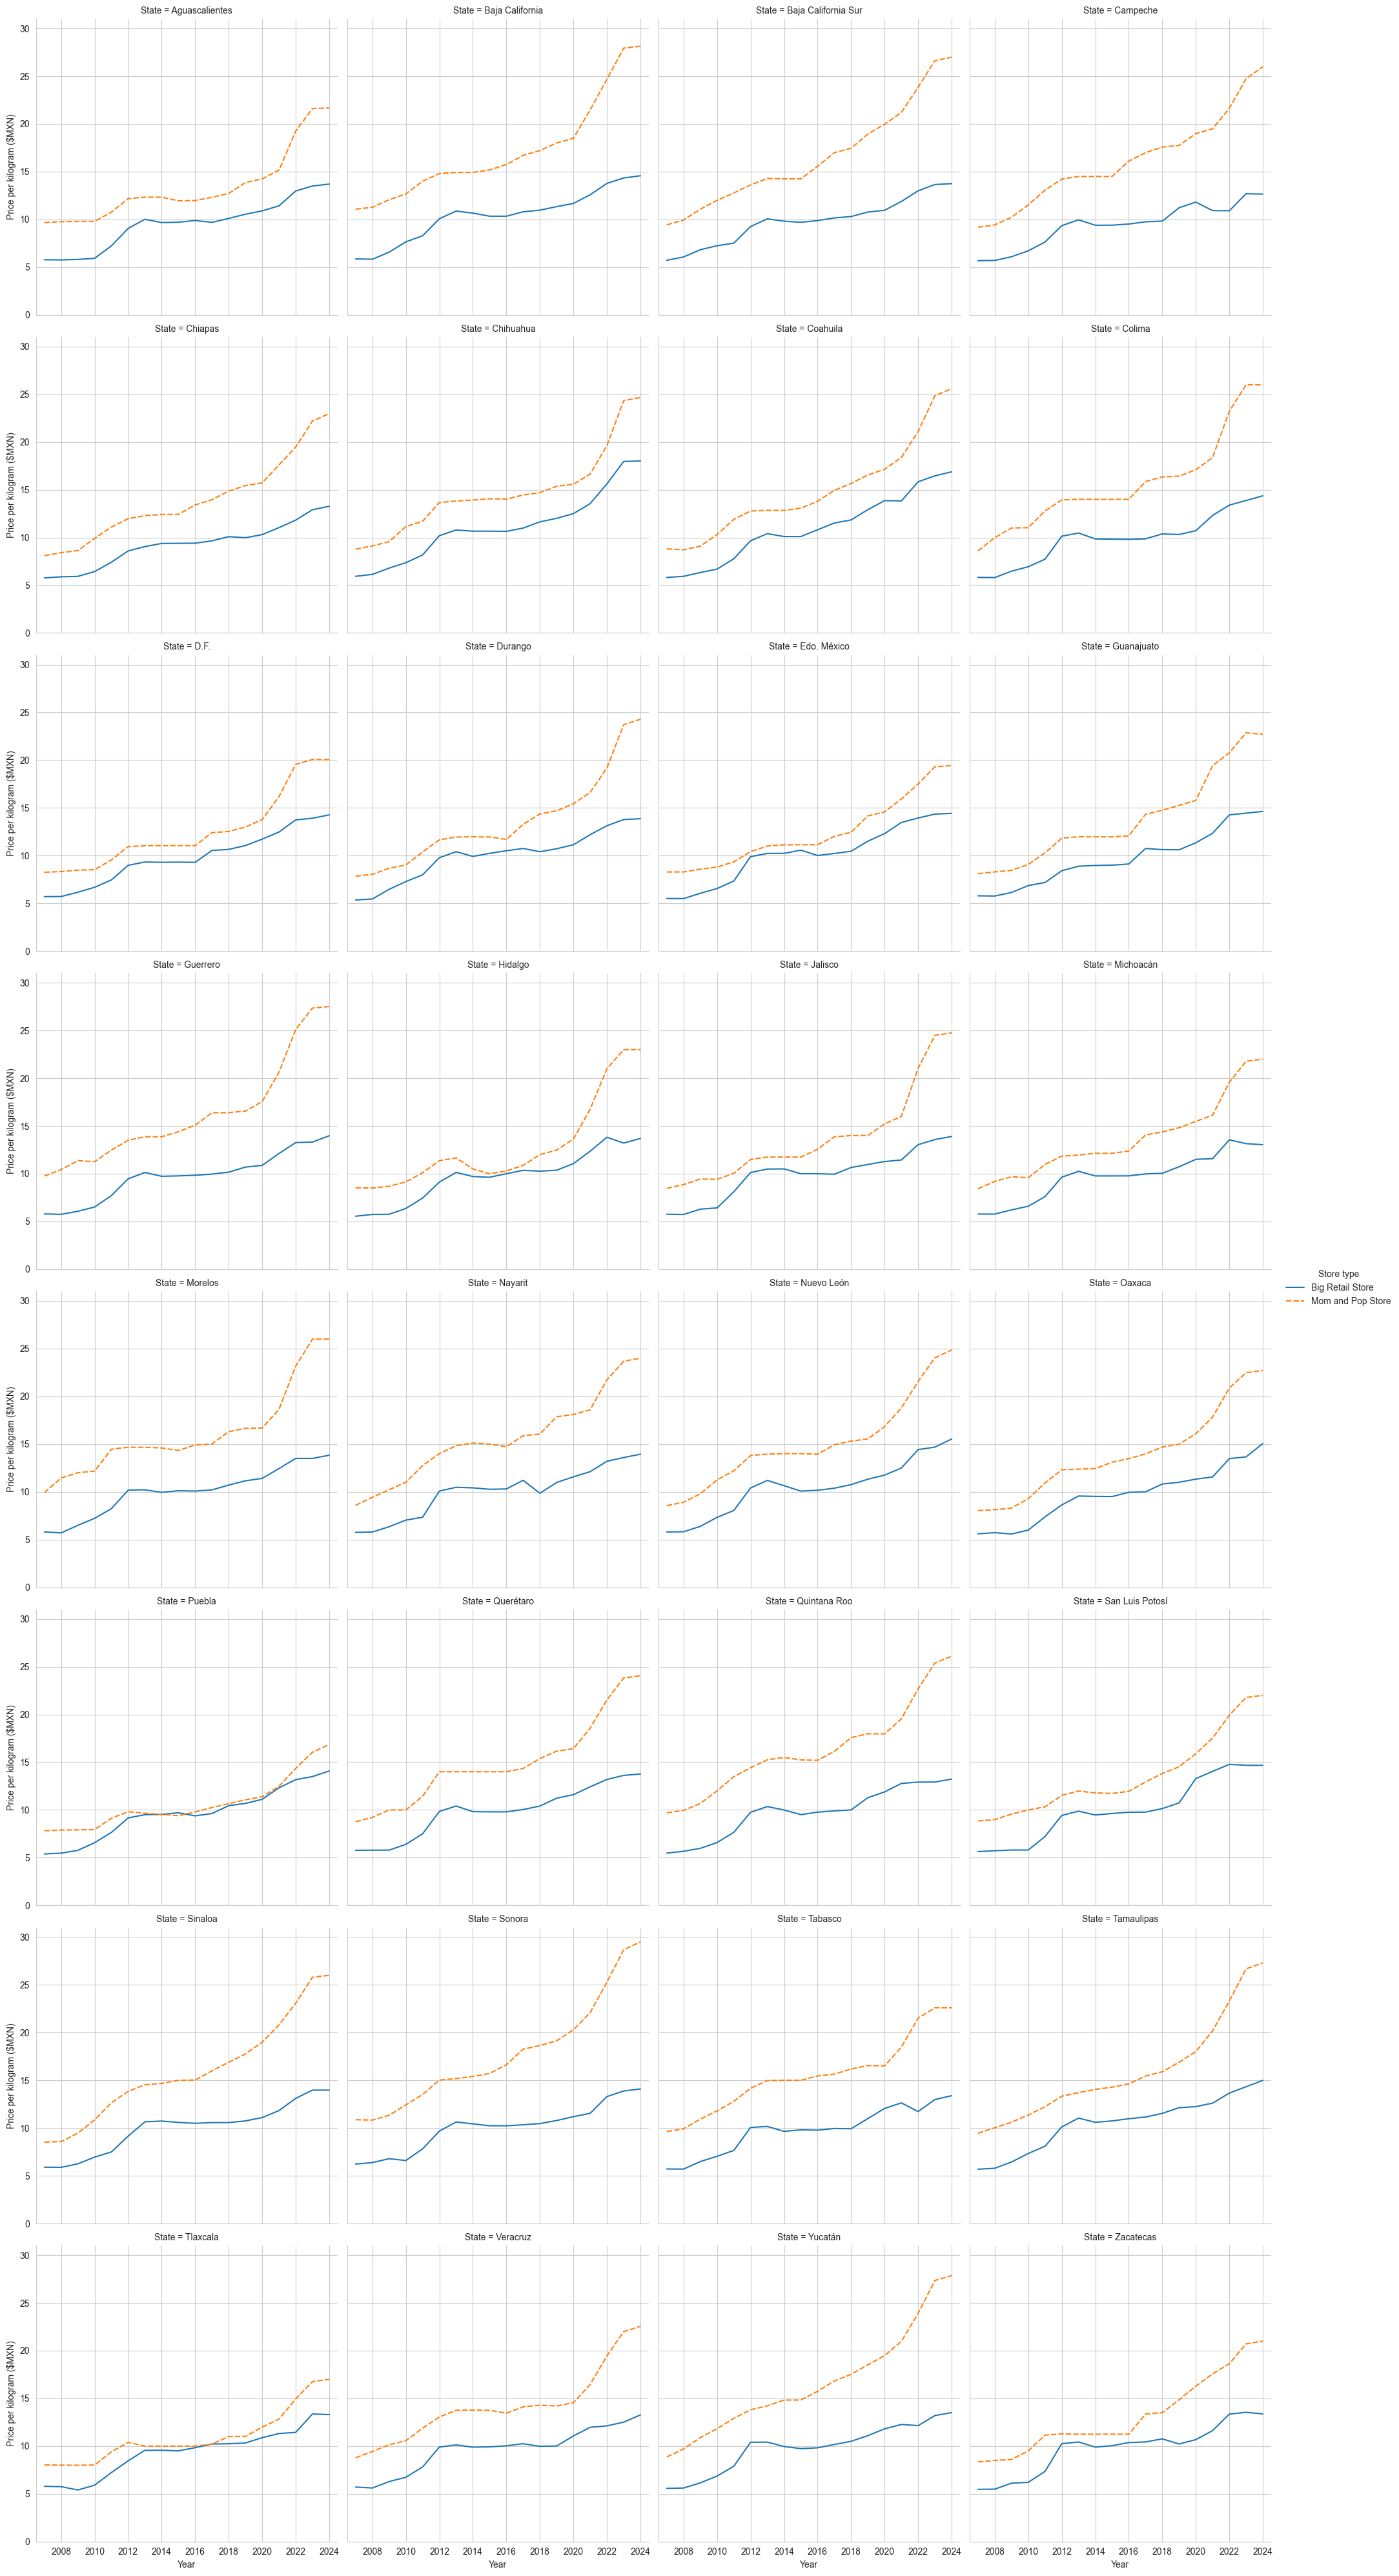

In [38]:
# plot prices per year, store type and state in a facet plot
sns.set_style('whitegrid')
g = sns.relplot(data=tortilla_prices_byStoreType_Year_State, kind='line', x='Year', y='Price per kilogram', hue='Store type', style='Store type', col='State', col_wrap=4)
g.set(ylim=(0, 31), xlim=(2006.5, 2024.5), ylabel='Price per kilogram ($MXN)')
plt.show()

&#x2705; Certain states gave seen moderate increases in prices, but in general, every state have suffered more drastically at mom-and-pop stores.

### Price increase year by year by store type

In [39]:
# mean price time series (by year and store type), wide format
tortilla_prices_byStoreType_Year_wide = tortilla_prices.groupby(['Store type', 'Year'])['Price per kilogram'].mean().to_frame().reset_index().pivot(index='Year', columns='Store type', values='Price per kilogram')

In [40]:
tortilla_prices_byStoreType_Year_wide

Store type,Big Retail Store,Mom and Pop Store
Year,,
2007,5.742156,8.966106
2008,5.792634,9.318599
2009,6.252945,9.867444
2010,6.781813,10.523425
2011,7.729758,11.707174
2012,9.627976,12.902494
2013,10.236948,13.183130
2014,9.992665,13.246201
2015,9.952026,13.312616


In [41]:
# compute differences by year and remove first and last records
# (remove 2024 because it is very early to really capture a difference from 2023)

tortilla_prices_byStoreType_Year_diffs = tortilla_prices_byStoreType_Year_wide.pct_change(1).loc[2008:2023]*100
tortilla_prices_byStoreType_Year_diffs

Store type,Big Retail Store,Mom and Pop Store
Year,,
2008,0.879063,3.931390
2009,7.946499,5.889783
2010,8.457905,6.647938
2011,13.977741,11.248697
2012,24.557275,10.210155
2013,6.325028,2.175052
2014,-2.386285,0.478425
2015,-0.406690,0.501384
2016,1.122792,2.513789


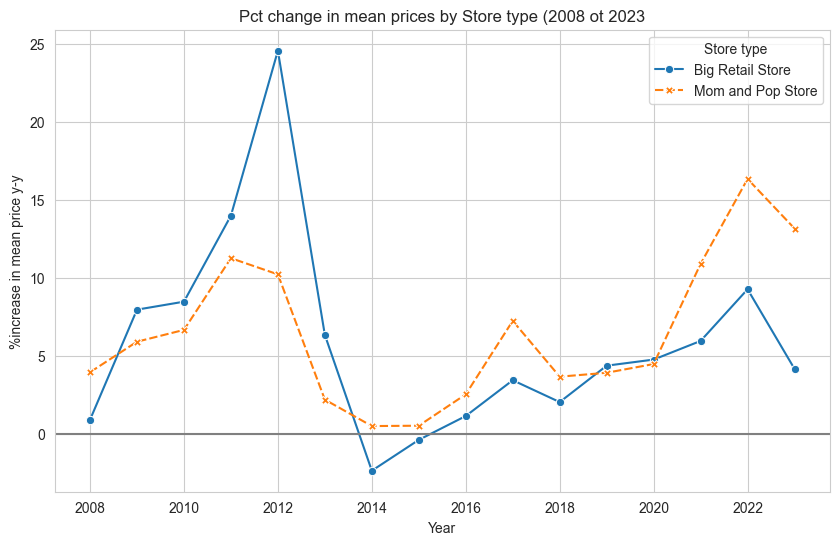

In [43]:
# plot mean price increase by year
plt.figure(figsize=(10,6))

g = sns.lineplot(tortilla_prices_byStoreType_Year_diffs, markers = True)
g.set(title = "Pct change in mean prices by Store type (2008 ot 2023", ylabel = "%increase in mean price y-y")
plt.axhline(y = 0, color = 'gray')

plt.show()

✅ Following COVID-19 pandemic, Tortilla prices increased significantly reaching levels of inflation of up to 16.33% and 9.25% in mom-and-pop and big retailer stores, respectively. The 2008 economic recession had a huge impact on prices in the late 2010's, early 2020's for Big Retail Stores, probably to an increase in the dollar price and the international maize prices that followed the recession